In [64]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_drug_df,clinical_trial_df, on = 'Mouse ID', how = 'left')

# Display the data table for preview

complete_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [65]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = complete_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
avg_tumor = grouped_df.mean()

# Convert to DataFrame
avg_tumor = avg_tumor.reset_index()

# Preview DataFrame
avg_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [66]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_error = grouped_df.sem()

# Convert to DataFrame
tumor_standard_error_df = pd.DataFrame(tumor_standard_error)

# Preview DataFrame
tumor_standard_error_df.reset_index(inplace = True)
tumor_standard_error.head()


Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [67]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_tumor = avg_tumor.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
pivot_avg_tumor.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


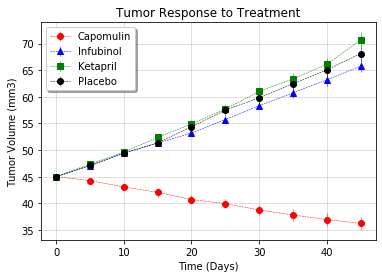

In [151]:
# Generate the Plot (with Error Bars)
drug_list = [("Capomulin", 'o', 'red'), ("Infubinol", '^', 'blue'), ("Ketapril", 's', 'green'), ("Placebo", 'o', 'black')]

for drug, marker, colors in drug_list:
    ste = tumor_standard_error[drug]
    tumor_plot = plt.errorbar(pivot_avg_tumor.index, pivot_avg_tumor[drug], ste,
                             fmt=marker, color = colors, ls = '--', label = drug, linewidth = 0.5)

plt.legend(loc = 'upper left', shadow = True)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha = 0.5)


# Save the Figure
plt.savefig("../Images/tumor_response_to_treatment.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [118]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met = complete_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
avg_met = grouped_met.mean()

# Convert to DataFrame
avg_met = avg_met_df.reset_index()
avg_met_df = pd.DataFrame(avg_met)


# Preview DataFrame
avg_met_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [96]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error = grouped_met.sem()

# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error)

# Preview DataFrame

standard_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [119]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_met_df = avg_met_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')


# Preview that Reformatting worked

pivot_avg_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


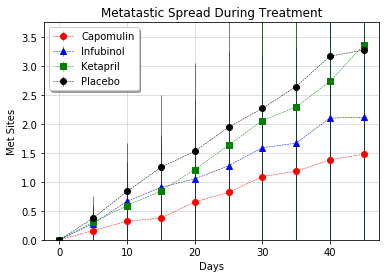

In [165]:
# Generate the Plot (with Error Bars)
drug_list2 = [("Capomulin", 'o', 'red'), ("Infubinol", '^', 'blue'), ("Ketapril", 's', 'green'), ("Placebo", 'o', 'black')]

fig, ax = plt.subplots()
for drug, marker, colors in drug_list2:
    ste = pivot_avg_met_df[drug]
    met_plot = plt.errorbar(pivot_avg_met_df.index, 
                            pivot_avg_met_df[drug],
                            ste,
                            fmt=marker, color = colors, 
                            ls = '--', label = drug, 
                            linewidth = 0.5)
    


plt.legend(loc = 'upper left', shadow = True)
plt.title("Metatastic Spread During Treatment")
plt.xlabel("Days")
plt.ylabel("Met Sites")
plt.grid(alpha = 0.5)
ax.set_ylim(0,3.75)
# Save the Figure
plt.savefig("../Images/metatastic_spread_during_treatment.png")

# Show the Figure
plt.show()

<Figure size 432x288 with 0 Axes>

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [168]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = complete_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
mice_count_df = mice.nunique()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count_df)

# Preview DataFrame
mice_count_df.reset_index(inplace = True)
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [170]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_count_df = mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')

# Preview the Data Frame
pivot_mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


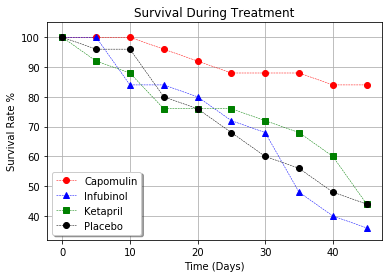

In [187]:
# Generate the Plot (Accounting for percentages)
drug_list2 = [("Capomulin", 'o', 'red'), ("Infubinol", '^', 'blue'), ("Ketapril", 's', 'green'), ("Placebo", 'o', 'black')]

fig, ax = plt.subplots()
for drug, marker, colors in drug_list2:
    total_mouse = pivot_mice_count_df[drug][0]
    survival_rate = (pivot_mice_count_df[drug]/total_mouse)*100
    ste = pivot_mice_count_df[drug]
    survival_plot = plt.errorbar(pivot_mice_count_df.index,
                                 survival_rate,                          
                                fmt=marker, color = colors, 
                                ls = '--', label = drug, 
                                linewidth = 0.5)
    


plt.legend(loc = 'best', shadow = True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")
plt.grid(alpha = 1)
ax.set_ylim(32,105)


# Save the Figure
plt.savefig("../Images/survival_during_treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [188]:
# Calculate the percent changes for each drug
percent = (pivot_avg_tumor.iloc[-1]/pivot_avg_tumor.iloc[0]-1)*100

# Display the data to confirm
percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

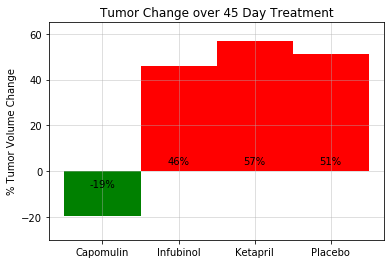

In [214]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
passing = percent > 0

# Orient widths. Add labels, tick marks, etc. 
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
change = [(percent)[drug] for drug in drugs]
change_plt = plt.bar(drugs, change, width = -1, align = 'center', color = passing.map({True: 'r', False: 'g'}))
plt.ylim(-30,65)
plt.grid(alpha = 0.5)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='black',
                ha='center', va='bottom')
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig("../Images/change_over_45_days.png")

# Show the Figure
fig.show()

#I chose to set the % color to black as I think it looks better
#I also though that aligning center was better on the eyes than edge and easier to read
#I took these liberties, no deductions please


In [ ]:
#I chose to set the % color to black as I think it looks better
#I also though that aligning center was better on the eyes than edge and easier to read
#I took these liberties, no deductions please

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#3 Observations

# The first thing that we notice is that the drug Capomulin is the clear winner outperforming the other subjects on every test.
# The best performer seemed to be left out of our data set "Ramicane"
# The Placebo seemed to be just as effective as the other 2 drugs